# **Loading Final Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('final_dataset_with_labels_using_svm.csv')

display(df)

username                                     clean_text_fix  \
0         radhynkania  stres baca berita covid demam panas dingin sem...   
1      BobbieTrussell  berhati hatilah berita palsu pertimbangkan ber...   
2     Fatimah57403657  pemilihan janji janji palsu masyarakat pemboho...   
3          WahidUnyax  lawan berita palsu hoaks disinformasi tercapai...   
4      Kota_Tangerang  pemerintah kota pemerintahan kota tangerang di...   
...               ...                                                ...   
1173          Felsel_  bang jhon bodoh pemilihan berlaku dasar hukum ...   
1174  Anika_Saraswari  anjing pemilihan selesai orang terkena kabar h...   
1175    TriantoHerson  sindir orde pemilihan pemenangnya presidenya s...   
1176       DindaP1805  demokrasi kuat ruang digital bersih mari menja...   
1177     perdamaian__                               pemilihan anti hoaks   

         label  
0     nonhoaks  
1     nonhoaks  
2        hoaks  
3     nonhoaks  
4     nonhoaks  
...        ...  
1173     hoaks  
1174     hoaks  
1175     hoaks  
1176  nonhoaks  
1177  nonhoaks  

[1178 rows x 3 columns]

# **Kelas Hoaks**


In [ ]:
df_hoaks = df[df['label'] == 'hoaks']

display(df_hoaks)

username                                     clean_text_fix  \
2     Fatimah57403657  pemilihan janji janji palsu masyarakat pemboho...   
17            cre4tor  lelah pemilihan dipakai era penjajahan zaman b...   
31          wotasepur  hoaks grup whatsapp keluarga jelang pemilihan ...   
36         annisawidi  sumpah lelah banget memantau lini berita klari...   
42    the1flash474996  setuju disuruh mengeluarkan hasil survei mingg...   
...               ...                                                ...   
1170         _0xecure  akunnya pemilihan blok mual lihat twitnya laki...   
1172  vincentyonathan  tolong ditangkap menyebar hoaks menghina presi...   
1173          Felsel_  bang jhon bodoh pemilihan berlaku dasar hukum ...   
1174  Anika_Saraswari  anjing pemilihan selesai orang terkena kabar h...   
1175    TriantoHerson  sindir orde pemilihan pemenangnya presidenya s...   

      label  
2     hoaks  
17    hoaks  
31    hoaks  
36    hoaks  
42    hoaks  
...     ...  
1170  hoaks  
1172  hoaks  
1173  hoaks  
1174  hoaks  
1175  hoaks  

[505 rows x 3 columns]

Pembobotan Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df_hoaks['clean_text_fix'])

tfidf_df_hoaks = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

display(tfidf_df_hoaks)

abah  abal  abang  abis  acak  acara  acuan  adab  adat  ade  ...  \
0     0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
1     0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
2     0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
3     0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
4     0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
..    ...   ...    ...   ...   ...    ...    ...   ...   ...  ...  ...   
500   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
501   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
502   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
503   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   
504   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0   0.0  0.0  ...   

     yayasan  yosodiningrat  youtube  yuk  yuzril  zakar  zalim     zaman  \
0        0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
1        0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.227617   
2        0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
3        0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
4        0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
..       ...            ...      ...  ...     ...    ...    ...       ...   
500      0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
501      0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
502      0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
503      0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   
504      0.0            0.0      0.0  0.0     0.0    0.0    0.0  0.000000   

     zarry  zeus  
0      0.0   0.0  
1      0.0   0.0  
2      0.0   0.0  
3      0.0   0.0  
4      0.0   0.0  
..     ...   ...  
500    0.0   0.0  
501    0.0   0.0  
502    0.0   0.0  
503    0.0   0.0  
504    0.0   0.0  

[505 rows x 2477 columns]

Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = range(1,6)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i)
    km_model.fit(tfidf_df_hoaks)
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

[1, 2, 3, 4, 5]
[492.73835600162045, 488.67274268893266, 483.8583053538185, 483.50054295613063, 480.01812608297934]


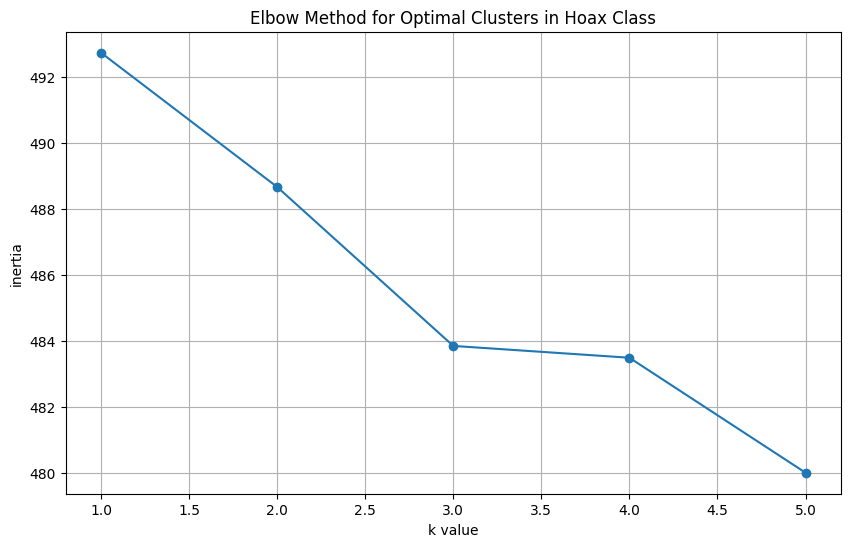

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.title('Elbow Method for Optimal Clusters in Hoax Class')
plt.grid()
plt.show()

In [ ]:
kn_hoaks = KMeans(n_clusters=3, random_state=1).fit(tfidf_df_hoaks)
kn_hoaks

KMeans(n_clusters=3, random_state=1)

In [ ]:
print(kn_hoaks.cluster_centers_)

[[ 5.42101086e-19 -1.51788304e-18  0.00000000e+00 ...  4.35470139e-03
  -1.08420217e-19 -5.42101086e-19]
 [ 2.49366500e-18  3.53402281e-03 -4.11996826e-18 ...  1.05868569e-03
  -2.05998413e-18  9.75781955e-19]
 [ 1.19868620e-03  6.50521303e-18  3.24398816e-03 ...  6.45516291e-03
   1.05000981e-03  1.55067970e-03]]


In [ ]:
labels_hoaks = kn_hoaks.labels_
display(labels_hoaks)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1,

Menambahkan Label Cluster ke Dataset

In [ ]:
import pandas as pd
df_hoaks_w = df_hoaks.copy()
df_hoaks_w['Cluster'] = labels_hoaks
display(df_hoaks_w )

df_hoaks_w.to_csv('df_with_cluster.csv', index=False)


username                                     clean_text_fix  \
2     Fatimah57403657  pemilihan janji janji palsu masyarakat pemboho...   
17            cre4tor  lelah pemilihan dipakai era penjajahan zaman b...   
31          wotasepur  hoaks grup whatsapp keluarga jelang pemilihan ...   
36         annisawidi  sumpah lelah banget memantau lini berita klari...   
42    the1flash474996  setuju disuruh mengeluarkan hasil survei mingg...   
...               ...                                                ...   
1170         _0xecure  akunnya pemilihan blok mual lihat twitnya laki...   
1172  vincentyonathan  tolong ditangkap menyebar hoaks menghina presi...   
1173          Felsel_  bang jhon bodoh pemilihan berlaku dasar hukum ...   
1174  Anika_Saraswari  anjing pemilihan selesai orang terkena kabar h...   
1175    TriantoHerson  sindir orde pemilihan pemenangnya presidenya s...   

      label  Cluster  
2     hoaks        1  
17    hoaks        1  
31    hoaks        1  
36    hoaks        1  
42    hoaks        1  
...     ...      ...  
1170  hoaks        1  
1172  hoaks        1  
1173  hoaks        1  
1174  hoaks        0  
1175  hoaks        2  

[505 rows x 4 columns]

Jumlah Masing - Masing Cluster pada Kelas Hoaks

In [ ]:
cluster_counts = df_hoaks_w['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    215
2    213
0     77
Name: count, dtype: int64


Visualisasi Bar Plot Distribusi Cluster

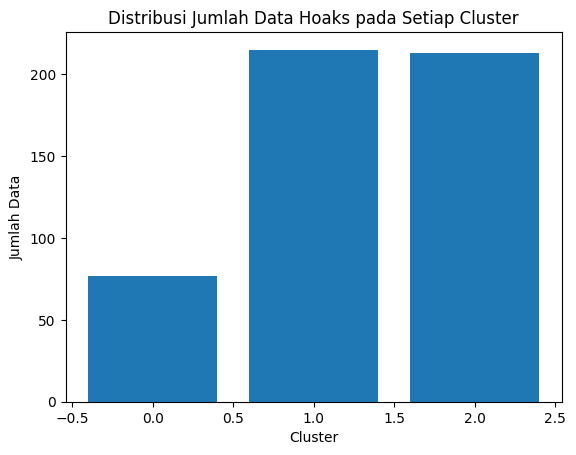

In [ ]:
import matplotlib.pyplot as plt

cluster_counts = {0: 77, 1: 215, 2: 213}

plt.bar(cluster_counts.keys(), cluster_counts.values())
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data Hoaks pada Setiap Cluster')
plt.show()


Visualisasi Pie Chart Distribusi Cluster

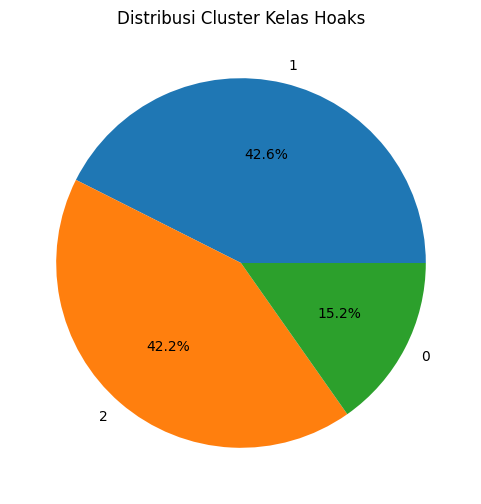

In [ ]:
cluster_counts = df_hoaks_w['Cluster'].value_counts()
plt.figure(figsize=(6, 6))
cluster_counts.plot.pie(autopct='%1.1f%%')
plt.title("Distribusi Cluster Kelas Hoaks")
plt.ylabel("")
plt.show()


Visualisasi t-SNE

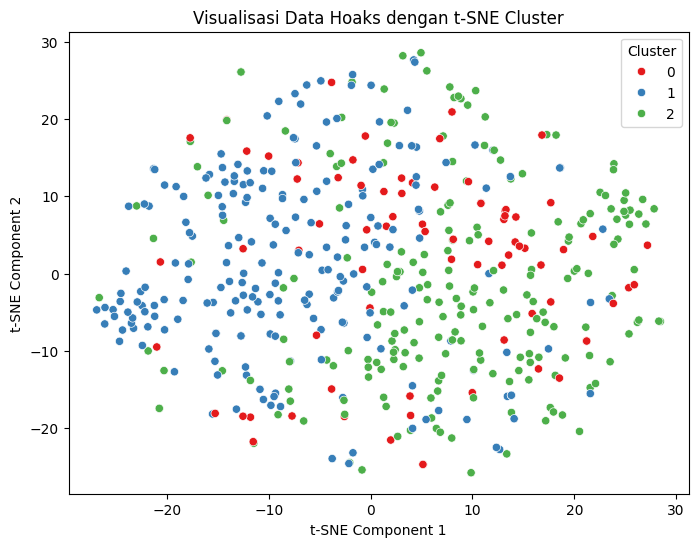

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Reduksi dimensi menjadi 2D
tsne = TSNE(n_components=2, random_state=42)
dense_tfidf_matrix = tfidf_matrix.toarray()
reduced_data_tsne = tsne.fit_transform(dense_tfidf_matrix)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data_tsne[:, 0], y=reduced_data_tsne[:, 1], hue=df_hoaks_w['Cluster'], palette='Set1', marker='o')
plt.title("Visualisasi Data Hoaks dengan t-SNE Cluster")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

Analisis Intra-Cluster (Internal):

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Hitung nilai Silhouette Score untuk semua data
silhouette_avg = silhouette_score(tfidf_df_hoaks, kn_hoaks.labels_)
print(f"Silhouette Score rata-rata kelas Hoaks untuk {kn_hoaks.n_clusters} cluster adalah: {silhouette_avg:.4f}")


Silhouette Score rata-rata kelas Hoaks untuk 3 cluster adalah: 0.0050


Silhouette Score per data poin

In [ ]:
silhouette_values = silhouette_samples(tfidf_df_hoaks, kn_hoaks.labels_)
print("Nilai Silhouette kelas Hoaks per data poin:")
print(silhouette_values)

Nilai Silhouette kelas Hoaks per data poin:
[ 1.23924671e-02  6.78793027e-03  8.85358781e-03  9.26031564e-03
  1.05692201e-02  1.21953157e-02  1.15785625e-02  1.28948565e-02
  1.22958872e-02  2.75817516e-03  4.15037442e-03  1.50260934e-02
  5.04993163e-03  3.11806724e-04  1.61652198e-02  8.42709940e-03
  1.05385505e-02  2.98227301e-03  7.92396596e-03  4.07989209e-03
  5.92474554e-03  9.66075300e-03 -2.44330125e-03  9.08439732e-03
  7.74763772e-03  3.92286878e-03  4.15763345e-03  4.48540371e-04
  3.40832837e-03 -9.68396198e-04  9.42094739e-03  1.59537554e-03
  2.98429904e-02  1.67416480e-02  1.54678007e-02  9.40169894e-03
  6.70395871e-03 -6.19629255e-04  1.31712602e-03  3.53579142e-03
 -2.05699741e-04  2.34103973e-03  1.70445200e-02 -6.07445808e-04
  3.54350617e-03  7.35840648e-03  2.85528170e-03  4.82936082e-03
  3.72689976e-03  3.21245984e-03  2.10297047e-03  2.00728033e-02
  3.60047063e-03  3.69974231e-03  1.74964335e-03  9.24596660e-03
  6.90542117e-03  4.56577836e-03 -1.99553005e-

Visualisasi Silhouette Score

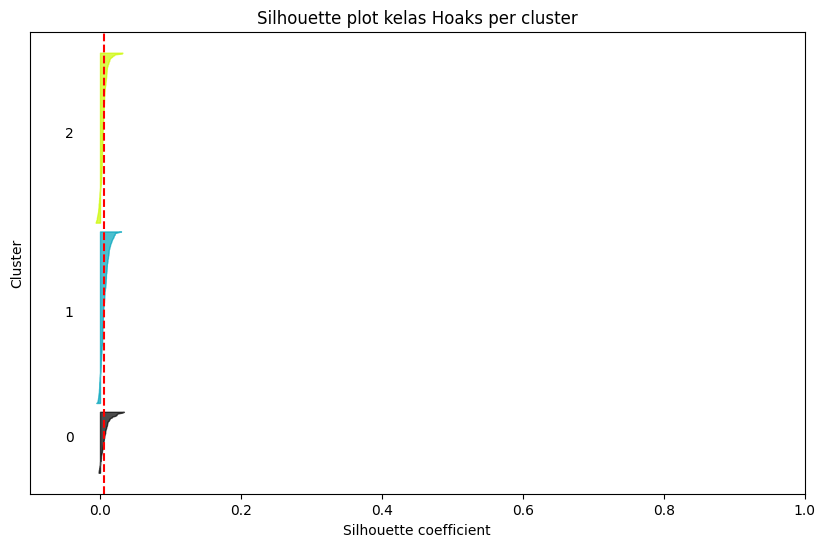

In [ ]:
def plot_silhouette(n_clusters, silhouette_values, labels):
    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Nilai Silhouette untuk cluster i
        cluster_silhouette_values = silhouette_values[labels == i]
        cluster_silhouette_values.sort()

        size_cluster = len(cluster_silhouette_values)
        y_upper = y_lower + size_cluster

        # Warna cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Tambahkan label untuk setiap cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Perbarui y_lower
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot kelas Hoaks per cluster")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

    # Garis rata-rata Silhouette
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    plt.show()

plot_silhouette(kn_hoaks.n_clusters, silhouette_values, kn_hoaks.labels_)

Analisis Antar-Cluster (Eksternal):

In [ ]:
!pip install scipy


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist # Import the cdist function
centroids = []
for cluster_id in sorted(df_hoaks_w['Cluster'].unique()):
    cluster_data = tfidf_matrix[df_hoaks_w['Cluster'] == cluster_id]
    centroid = cluster_data.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

print("Centroid tiap cluster:\n", centroids)


Centroid tiap cluster:
 [[0.         0.         0.         ... 0.0043547  0.         0.        ]
 [0.         0.00353402 0.         ... 0.00105869 0.         0.        ]
 [0.00119869 0.         0.00324399 ... 0.00645516 0.00105001 0.00155068]]


Visualisasi Centroid Cluster

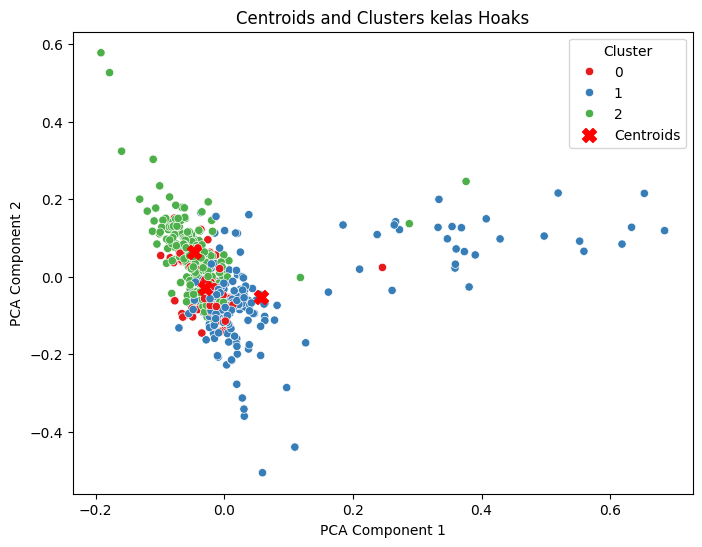

In [ ]:
centroids = []
for cluster_id in sorted(df_hoaks_w['Cluster'].unique()):
    cluster_data = reduced_data[df_hoaks_w['Cluster'] == cluster_id]
    centroid = cluster_data.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

# Plot data points dan centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_hoaks_w['Cluster'], palette='Set1', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='X')
plt.title("Centroids and Clusters kelas Hoaks")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
distances = cdist(centroids, centroids, metric='euclidean')
print("Jarak antar centroid:\n", distances)

Jarak antar centroid:
 [[0.         0.08999865 0.09399404]
 [0.08999865 0.         0.15579902]
 [0.09399404 0.15579902 0.        ]]


Visualisasi dengan heatmap

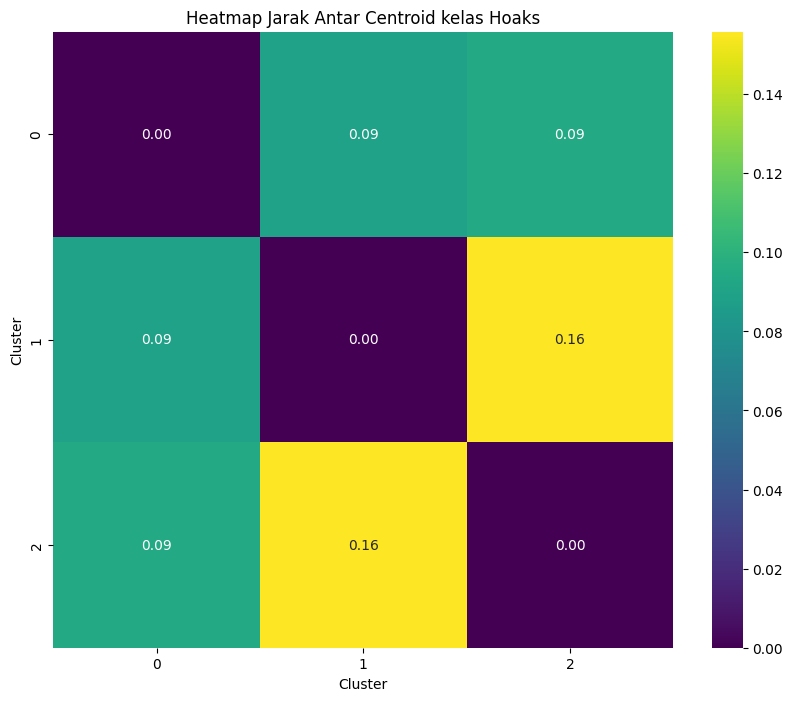

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(distances, annot=True, cmap='viridis', fmt='.2f', cbar=True,
            xticklabels=sorted(df_hoaks_w['Cluster'].unique()),
            yticklabels=sorted(df_hoaks_w['Cluster'].unique()))

plt.title("Heatmap Jarak Antar Centroid kelas Hoaks")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Hitung Davies-Bouldin Index using the dense array
dense_tfidf_matrix = tfidf_matrix.toarray()
db_index = davies_bouldin_score(dense_tfidf_matrix, df_hoaks_w['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 10.2169731771492


1. Cluster 0

In [ ]:
cluster_0_hoaks = df_hoaks_w[df_hoaks_w['Cluster'] == 0]
display(cluster_0_hoaks)

username                                     clean_text_fix  \
182      FaqihSyahrir  jokowi pemilihan putaran perpanjang bantuan di...   
184    akubknpelarian              kakak pemilihan bohong banget putaran   
190      budiwidagdo2  popularitas ramai dimana bukti survei survei b...   
194           aconk_s  tolong rakyat rindu pemimpin pintar tukang boh...   
201         AmirFawzi  gitu bohong alias hoaks orang pemilihan pesta ...   
...               ...                                                ...   
1047     slothbabyyyy  orang kerja perusahaan bagus skeptis lihat pa ...   
1159   rustamanuus158                         kecurangan pemilihan orang   
1166     TurnBackHoax  rapat internal bocor januari suara hasil pemil...   
1169     TurnBackHoax  bocor hasil pemilihan ditentukan januari naras...   
1174  Anika_Saraswari  anjing pemilihan selesai orang terkena kabar h...   

      label  Cluster  
182   hoaks        0  
184   hoaks        0  
190   hoaks        0  
194   hoaks        0  
201   hoaks        0  
...     ...      ...  
1047  hoaks        0  
1159  hoaks        0  
1166  hoaks        0  
1169  hoaks        0  
1174  hoaks        0  

[77 rows x 4 columns]

Nilai Cosine Similarity Antar Data pada Cluster 0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_0 = vectorizer.fit_transform(cluster_0_hoaks['clean_text_fix'])

cosine_sim_matrix_0 = cosine_similarity(tfidf_matrix_cluster_0)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 0
print("Cosine Similarity Matrix for Cluster 0:")
print(cosine_sim_matrix_0[:5, :5])  # Menampilkan 5x5 matriks pertama untuk efisiensi

Cosine Similarity Matrix for Cluster 0:
[[1.         0.23727237 0.05278973 0.0432996  0.0261242 ]
 [0.23727237 1.         0.05181866 0.04250311 0.06118803]
 [0.05278973 0.05181866 1.         0.05925028 0.02760483]
 [0.0432996  0.04250311 0.05925028 1.         0.08591748]
 [0.0261242  0.06118803 0.02760483 0.08591748 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 0

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_0 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_0[i, j]}")

Data ke-59 dan Data ke-60 memiliki similarity lebih dari 0.5: 0.5130305009327828
Data ke-59 dan Data ke-61 memiliki similarity lebih dari 0.5: 0.5381799686803929
Data ke-59 dan Data ke-62 memiliki similarity lebih dari 0.5: 0.6256090681122417
Data ke-60 dan Data ke-59 memiliki similarity lebih dari 0.5: 0.5130305009327828
Data ke-60 dan Data ke-61 memiliki similarity lebih dari 0.5: 0.7053882205398269
Data ke-60 dan Data ke-62 memiliki similarity lebih dari 0.5: 0.713219003119746
Data ke-61 dan Data ke-59 memiliki similarity lebih dari 0.5: 0.5381799686803929
Data ke-61 dan Data ke-60 memiliki similarity lebih dari 0.5: 0.7053882205398269
Data ke-61 dan Data ke-62 memiliki similarity lebih dari 0.5: 0.6184400743357679
Data ke-62 dan Data ke-59 memiliki similarity lebih dari 0.5: 0.6256090681122417
Data ke-62 dan Data ke-60 memiliki similarity lebih dari 0.5: 0.713219003119746
Data ke-62 dan Data ke-61 memiliki similarity lebih dari 0.5: 0.6184400743357679


Visualisasi Force-Directed Graph

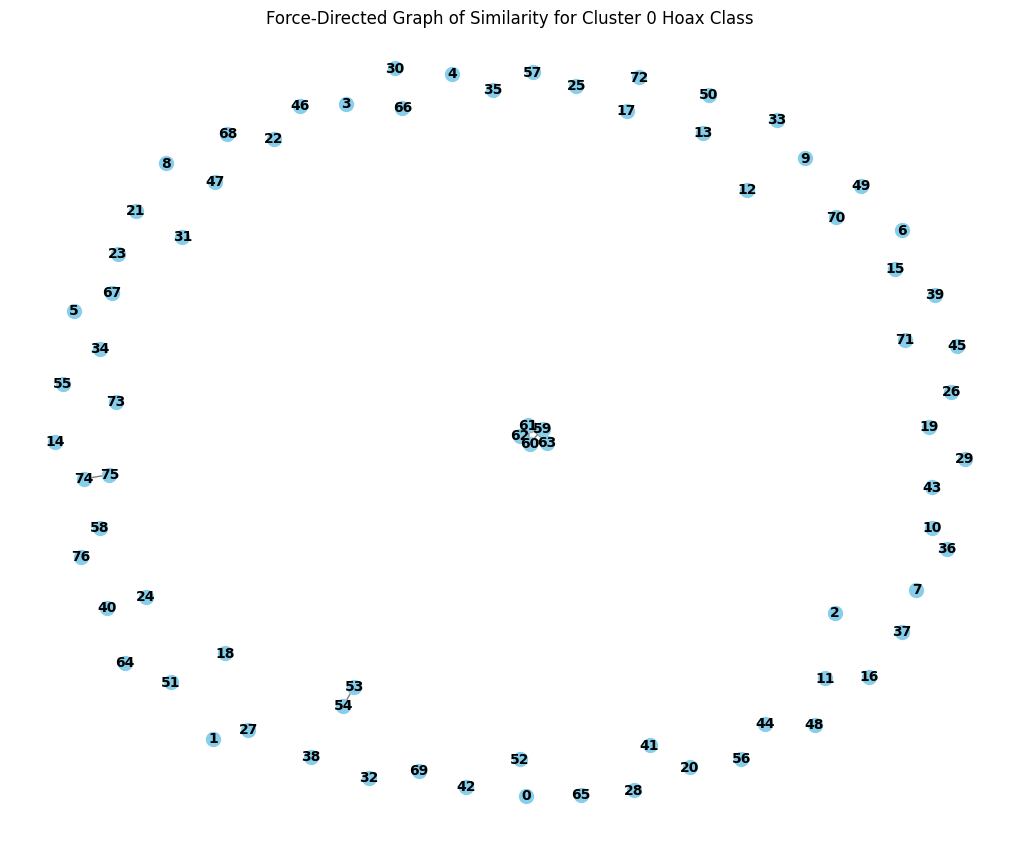

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_0_hoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3  # Coba dengan threshold lebih rendah
for i in range(cosine_sim_matrix_0.shape[0]):
    for j in range(i+1, cosine_sim_matrix_0.shape[1]):
        if cosine_sim_matrix_0[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_0[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 0 Hoax Class")
    plt.show()


Visualisasi WordCloud Cluster 0 Kelas Hoaks

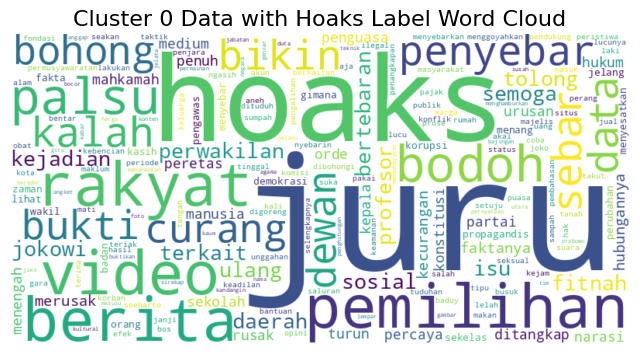

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 0
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} Data with Hoaks Label Word Cloud', fontsize=16)
plt.axis('off')
plt.show()


2. cluster 1

In [ ]:
cluster_1_hoaks = df_hoaks_w[df_hoaks_w['Cluster'] == 1]
display(cluster_1_hoaks)

username                                     clean_text_fix  \
2     Fatimah57403657  pemilihan janji janji palsu masyarakat pemboho...   
17            cre4tor  lelah pemilihan dipakai era penjajahan zaman b...   
31          wotasepur  hoaks grup whatsapp keluarga jelang pemilihan ...   
36         annisawidi  sumpah lelah banget memantau lini berita klari...   
42    the1flash474996  setuju disuruh mengeluarkan hasil survei mingg...   
...               ...                                                ...   
1167     TurnBackHoax  olok olokan internasional indonesia hasil pemi...   
1168     TurnBackHoax  video warga baduy turun kota lawan preman pemi...   
1170         _0xecure  akunnya pemilihan blok mual lihat twitnya laki...   
1172  vincentyonathan  tolong ditangkap menyebar hoaks menghina presi...   
1173          Felsel_  bang jhon bodoh pemilihan berlaku dasar hukum ...   

      label  Cluster  
2     hoaks        1  
17    hoaks        1  
31    hoaks        1  
36    hoaks        1  
42    hoaks        1  
...     ...      ...  
1167  hoaks        1  
1168  hoaks        1  
1170  hoaks        1  
1172  hoaks        1  
1173  hoaks        1  

[215 rows x 4 columns]

Nilai Cosine Similarity Antar Data pada Cluster 1



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_1 = vectorizer.fit_transform(cluster_1_hoaks['clean_text_fix'])

cosine_sim_matrix_1 = cosine_similarity(tfidf_matrix_cluster_1)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 1
print("Cosine Similarity Matrix for Cluster 1:")
print(cosine_sim_matrix_1[:5, :5])  # Menampilkan 5x5 matriks pertama untuk efisiensi

Cosine Similarity Matrix for Cluster 1:
[[1.         0.04541268 0.08135011 0.06808077 0.08462852]
 [0.04541268 1.         0.0479067  0.08364433 0.02597351]
 [0.08135011 0.0479067  1.         0.0718197  0.04039423]
 [0.06808077 0.08364433 0.0718197  1.         0.03893839]
 [0.08462852 0.02597351 0.04039423 0.03893839 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 1

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_1 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_1[i, j]}")

Data ke-5 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.727760933445519
Data ke-6 dan Data ke-5 memiliki similarity lebih dari 0.5: 0.727760933445519
Data ke-7 dan Data ke-8 memiliki similarity lebih dari 0.5: 0.9416451190458209
Data ke-8 dan Data ke-7 memiliki similarity lebih dari 0.5: 0.9416451190458209
Data ke-51 dan Data ke-68 memiliki similarity lebih dari 0.5: 0.5144347010379795
Data ke-54 dan Data ke-56 memiliki similarity lebih dari 0.5: 0.9174357329349262
Data ke-54 dan Data ke-57 memiliki similarity lebih dari 0.5: 0.9174357329349262
Data ke-56 dan Data ke-54 memiliki similarity lebih dari 0.5: 0.9174357329349262
Data ke-56 dan Data ke-57 memiliki similarity lebih dari 0.5: 1.0000000000000004
Data ke-57 dan Data ke-54 memiliki similarity lebih dari 0.5: 0.9174357329349262
Data ke-57 dan Data ke-56 memiliki similarity lebih dari 0.5: 1.0000000000000004
Data ke-65 dan Data ke-66 memiliki similarity lebih dari 0.5: 0.7098544839155765
Data ke-66 dan Data ke-65 memiliki sim

Visualisasi Force-Directed Graph

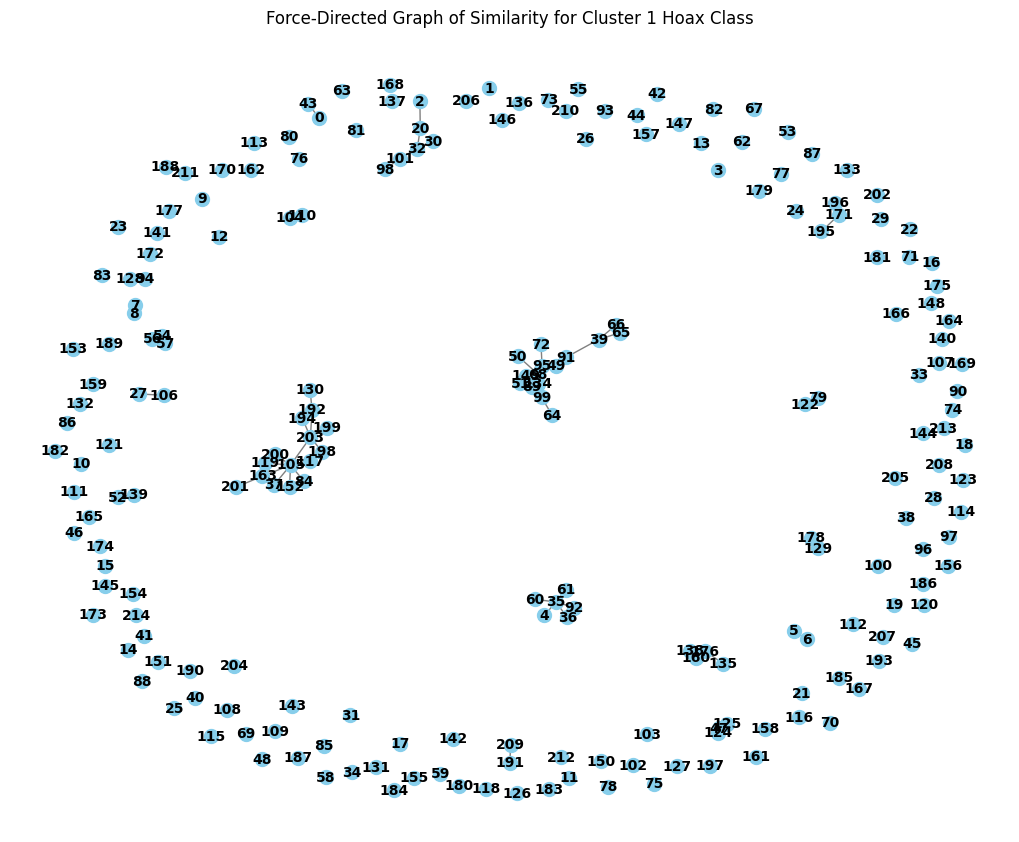

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_1_hoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3  # Coba dengan threshold lebih rendah
for i in range(cosine_sim_matrix_1.shape[0]):
    for j in range(i+1, cosine_sim_matrix_1.shape[1]):
        if cosine_sim_matrix_1[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_1[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 1 Hoax Class")
    plt.show()

Visualisasi WordCloud Cluster 1 Kelas Hoaks

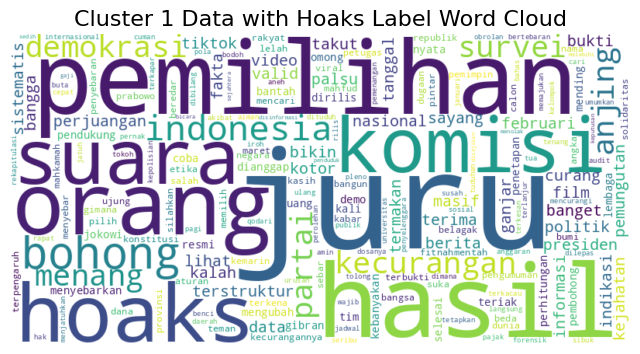

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 1
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} Data with Hoaks Label Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

3. cluster 2

In [ ]:
cluster_2_hoaks = df_hoaks_w[df_hoaks_w['Cluster'] == 2]
display(cluster_2_hoaks)

username                                     clean_text_fix  label  \
179        diyamed2  hasil pemilihan presiden besok bohong dunia in...  hoaks   
183    nurkholiswyd  persen kejujuran juru kampanye orator unggahan...  hoaks   
186    Bachtiarchoy  partai demokrasi indonesia perjuangan marah un...  hoaks   
187    Effendi65505               bohong bohong tepati janji pemilihan  hoaks   
188       themuunnn  bohong banget kakak anggaran pemilihan komisi ...  hoaks   
...             ...                                                ...    ...   
1138     geetracker  demo perkebunan sawit nampaknya kalimantan ses...  hoaks   
1139  3Muzaeny88005  prabowo haus jabatan menang pemilihan tangan s...  hoaks   
1144     ArdoyantoE  gambar foto tenang tentram dimedia tenang roy ...  hoaks   
1164   dionwiyoko56  mentang prayogo pangestu orang kaya nomor indo...  hoaks   
1175  TriantoHerson  sindir orde pemilihan pemenangnya presidenya s...  hoaks   

      Cluster  
179         2  
183         2  
186         2  
187         2  
188         2  
...       ...  
1138        2  
1139        2  
1144        2  
1164        2  
1175        2  

[213 rows x 4 columns]

Nilai Cosine Similarity Antar Data pada Cluster 2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_2= vectorizer.fit_transform(cluster_2_hoaks['clean_text_fix'])

cosine_sim_matrix_2 = cosine_similarity(tfidf_matrix_cluster_2)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 2
print("Cosine Similarity Matrix for Cluster 2:")
print(cosine_sim_matrix_2[:5, :5])  # Menampilkan 5x5 matriks pertama untuk efisiensi

Cosine Similarity Matrix for Cluster 2:
[[1.         0.04659525 0.04793757 0.04932755 0.06031748]
 [0.04659525 1.         0.00825244 0.02520803 0.01597866]
 [0.04793757 0.00825244 1.         0.03669993 0.0442562 ]
 [0.04932755 0.02520803 0.03669993 1.         0.04969841]
 [0.06031748 0.01597866 0.0442562  0.04969841 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 2

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_2 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_2[i, j]}")

Data ke-8 dan Data ke-186 memiliki similarity lebih dari 0.5: 0.5463356460818186
Data ke-18 dan Data ke-22 memiliki similarity lebih dari 0.5: 0.7821097715441343
Data ke-22 dan Data ke-18 memiliki similarity lebih dari 0.5: 0.7821097715441343
Data ke-49 dan Data ke-162 memiliki similarity lebih dari 0.5: 0.5842372366494017
Data ke-123 dan Data ke-124 memiliki similarity lebih dari 0.5: 0.7932372073915661
Data ke-124 dan Data ke-123 memiliki similarity lebih dari 0.5: 0.7932372073915661
Data ke-133 dan Data ke-162 memiliki similarity lebih dari 0.5: 0.5426209453114016
Data ke-162 dan Data ke-49 memiliki similarity lebih dari 0.5: 0.5842372366494017
Data ke-162 dan Data ke-133 memiliki similarity lebih dari 0.5: 0.5426209453114016
Data ke-177 dan Data ke-182 memiliki similarity lebih dari 0.5: 0.522736785202004
Data ke-182 dan Data ke-177 memiliki similarity lebih dari 0.5: 0.522736785202004
Data ke-186 dan Data ke-8 memiliki similarity lebih dari 0.5: 0.5463356460818186
Data ke-193 dan 

Visualisasi Force-Directed Graph

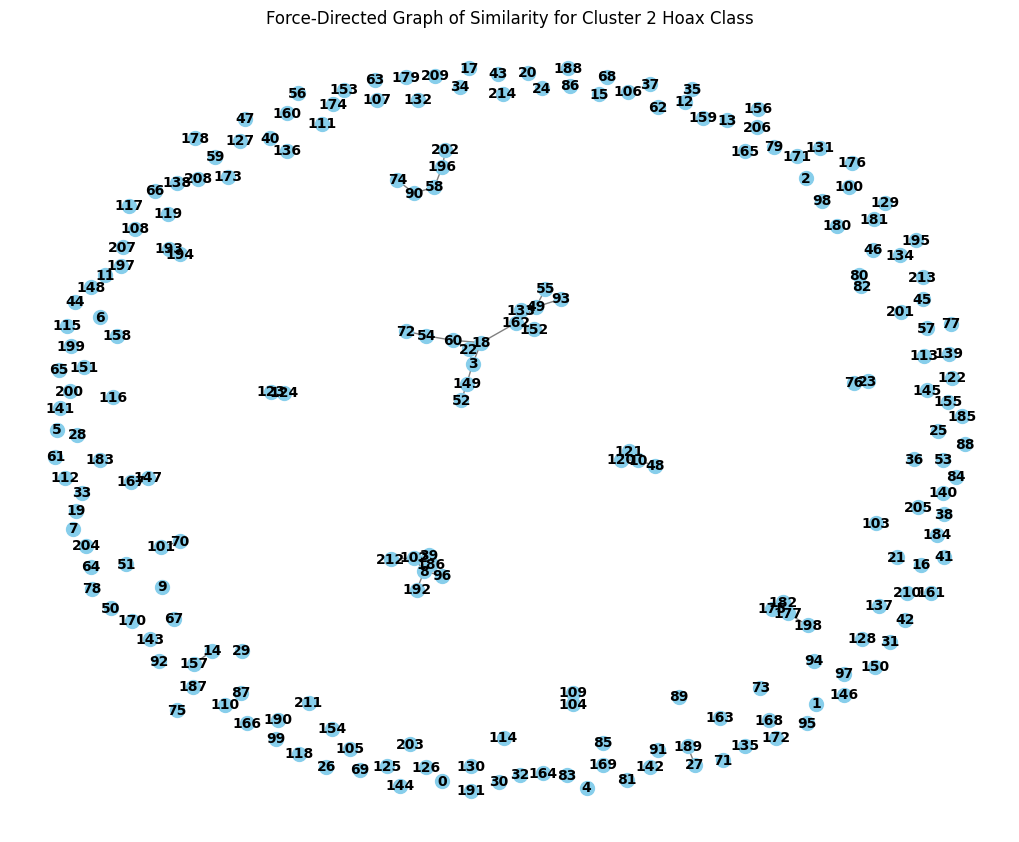

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_1_hoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3
for i in range(cosine_sim_matrix_2.shape[0]):
    for j in range(i+1, cosine_sim_matrix_2.shape[1]):
        if cosine_sim_matrix_2[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_2[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 2 Hoax Class")
    plt.show()

Visualisasi WordCloud Cluster 2 Kelas Hoaks

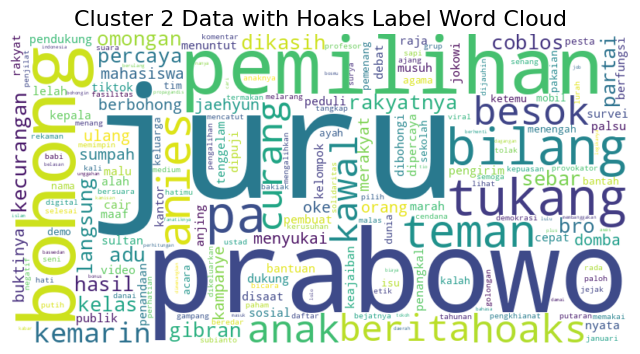

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 2
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} Data with Hoaks Label Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

# **Kelas NonHoaks**

In [ ]:
df_nonhoaks = df[df['label'] == 'nonhoaks']

display(df_nonhoaks)

username                                     clean_text_fix  \
0        radhynkania  stres baca berita covid demam panas dingin sem...   
1     BobbieTrussell  berhati hatilah berita palsu pertimbangkan ber...   
3         WahidUnyax  lawan berita palsu hoaks disinformasi tercapai...   
4     Kota_Tangerang  pemerintah kota pemerintahan kota tangerang di...   
5         s3mut1reng  dimanfaatkan kelompok radikal menyebarkan hoak...   
...              ...                                                ...   
1163  Jalurlangitygy  yuk mari bersatu jadikan pemilihan momen nilai...   
1165        annix_14                               pemilihan anti hoaks   
1171            wdtu  petani bersyukur harga beras mahal diuntungkan...   
1176      DindaP1805  demokrasi kuat ruang digital bersih mari menja...   
1177    perdamaian__                               pemilihan anti hoaks   

         label  
0     nonhoaks  
1     nonhoaks  
3     nonhoaks  
4     nonhoaks  
5     nonhoaks  
...        ...  
1163  nonhoaks  
1165  nonhoaks  
1171  nonhoaks  
1176  nonhoaks  
1177  nonhoaks  

[673 rows x 3 columns]

Pembobotan Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df_nonhoaks['clean_text_fix'])

tfidf_df_nonhoaks = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

display(tfidf_df_nonhoaks)

aamiin  abadi  acara   ad  adakan  adaptif  adil  administrasi  adu  \
0       0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
1       0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
2       0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
3       0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
4       0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
..      ...    ...    ...  ...     ...      ...   ...           ...  ...   
668     0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
669     0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
670     0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
671     0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   
672     0.0    0.0    0.0  0.0     0.0      0.0   0.0           0.0  0.0   

     aduan  ...  wilayan  witjaksono  wujudkan  yah  yogyakarta  yudhoyono  \
0      0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
1      0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
2      0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
3      0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
4      0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
..     ...  ...      ...         ...       ...  ...         ...        ...   
668    0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
669    0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
670    0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
671    0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   
672    0.0  ...      0.0         0.0       0.0  0.0         0.0        0.0   

          yuk  zalim  zaman  zoom  
0    0.000000    0.0    0.0   0.0  
1    0.000000    0.0    0.0   0.0  
2    0.000000    0.0    0.0   0.0  
3    0.000000    0.0    0.0   0.0  
4    0.000000    0.0    0.0   0.0  
..        ...    ...    ...   ...  
668  0.283413    0.0    0.0   0.0  
669  0.000000    0.0    0.0   0.0  
670  0.000000    0.0    0.0   0.0  
671  0.000000    0.0    0.0   0.0  
672  0.000000    0.0    0.0   0.0  

[673 rows x 1794 columns]

Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = range(1,8)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i)
    km_model.fit(tfidf_df_nonhoaks)
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

[1, 2, 3, 4, 5, 6, 7]
[640.4154501053149, 627.2166539189243, 613.2324238214891, 594.8169899961164, 597.3647781777054, 570.3889905474276, 568.5332517723217]


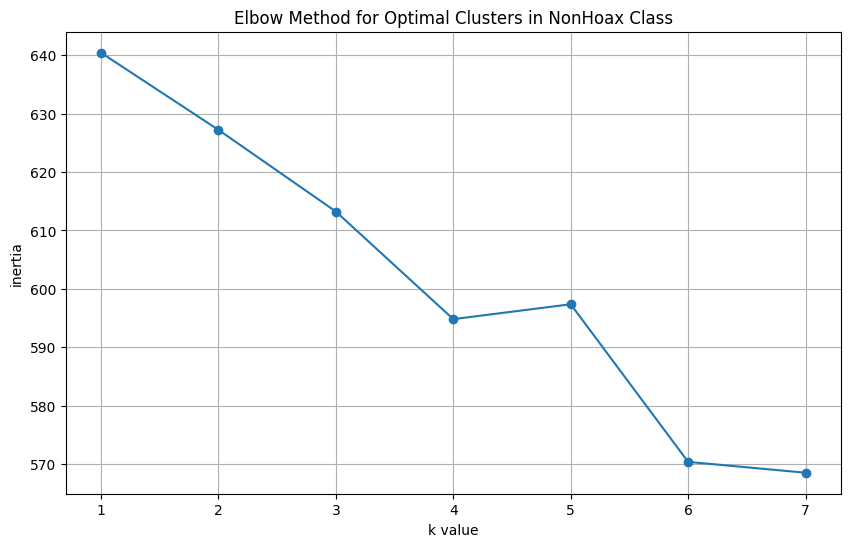

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.title('Elbow Method for Optimal Clusters in NonHoax Class')
plt.grid()
plt.show()


In [ ]:
kn_nonhoaks = KMeans(n_clusters=4, random_state=1).fit(tfidf_df_nonhoaks)
kn_nonhoaks

KMeans(n_clusters=4, random_state=1)

In [ ]:
print(kn_nonhoaks.cluster_centers_)

[[ 0.00000000e+00 -8.67361738e-19  4.33680869e-19 ...  1.08420217e-19
   1.30104261e-18  1.62630326e-19]
 [ 1.62630326e-18  4.33680869e-19 -8.67361738e-19 ... -5.96311195e-19
  -3.03576608e-18 -5.42101086e-19]
 [ 9.95748467e-04  1.21600036e-03  2.28961648e-03 ...  5.29344640e-04
   3.12437142e-03  4.39369121e-04]
 [ 1.73472348e-18  4.57444750e-03 -1.30104261e-18 ... -5.96311195e-19
  -3.03576608e-18 -5.42101086e-19]]


In [ ]:
labels_nonhoaks = kn_nonhoaks.labels_
display(labels_nonhoaks)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 3, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2,
       3, 3, 3, 1, 2, 3, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 3, 2, 3, 2,
       2, 1, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,

Menambahkan Label Cluster ke Dataset

In [ ]:
import pandas as pd
df_nonhoaks_w = df_nonhoaks.copy()
df_nonhoaks_w['Cluster'] = labels_nonhoaks
display(df_nonhoaks_w)

df_nonhoaks_w.to_csv('df2_with_cluster.csv', index=False)


username                                     clean_text_fix  \
0        radhynkania  stres baca berita covid demam panas dingin sem...   
1     BobbieTrussell  berhati hatilah berita palsu pertimbangkan ber...   
3         WahidUnyax  lawan berita palsu hoaks disinformasi tercapai...   
4     Kota_Tangerang  pemerintah kota pemerintahan kota tangerang di...   
5         s3mut1reng  dimanfaatkan kelompok radikal menyebarkan hoak...   
...              ...                                                ...   
1163  Jalurlangitygy  yuk mari bersatu jadikan pemilihan momen nilai...   
1165        annix_14                               pemilihan anti hoaks   
1171            wdtu  petani bersyukur harga beras mahal diuntungkan...   
1176      DindaP1805  demokrasi kuat ruang digital bersih mari menja...   
1177    perdamaian__                               pemilihan anti hoaks   

         label  Cluster  
0     nonhoaks        2  
1     nonhoaks        2  
3     nonhoaks        2  
4     nonhoaks        2  
5     nonhoaks        2  
...        ...      ...  
1163  nonhoaks        2  
1165  nonhoaks        2  
1171  nonhoaks        2  
1176  nonhoaks        2  
1177  nonhoaks        2  

[673 rows x 4 columns]

Jumlah Masing - Masing Cluster pada Kelas NoHoaks

In [ ]:
cluster_nonhoaks_counts = df_nonhoaks_w['Cluster'].value_counts()
print(cluster_nonhoaks_counts)


Cluster
2    430
3     98
1     95
0     50
Name: count, dtype: int64


Visualisasi Bar Plot Distribusi Cluster

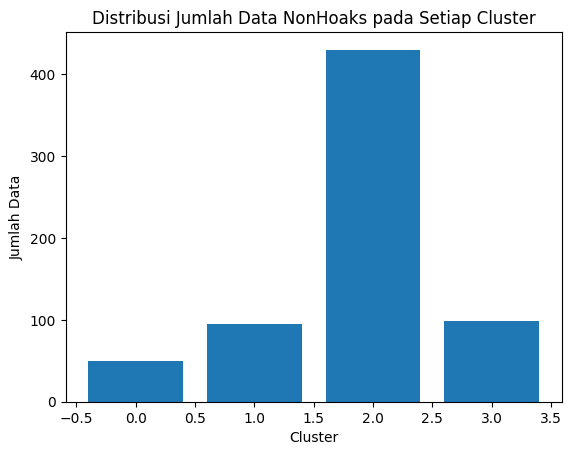

In [ ]:
import matplotlib.pyplot as plt

cluster_counts = {0: 50, 1: 95, 2: 430, 3: 98}

plt.bar(cluster_counts.keys(), cluster_counts.values())
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data NonHoaks pada Setiap Cluster')
plt.show()


Visualisasi Pie Chart Distribusi Cluster

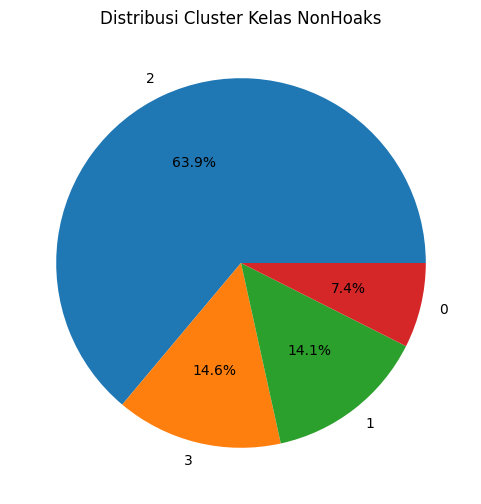

In [ ]:
cluster_counts = df_nonhoaks_w['Cluster'].value_counts()
plt.figure(figsize=(6, 6))
cluster_counts.plot.pie(autopct='%1.1f%%')
plt.title("Distribusi Cluster Kelas NonHoaks")
plt.ylabel("")
plt.show()


Visualisasi t-SNE

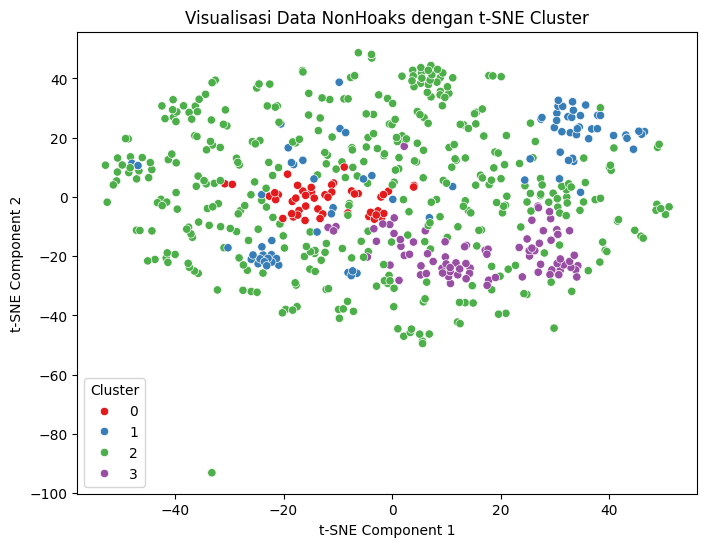

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Reduksi dimensi menjadi 2D menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
dense_tfidf_matrix = tfidf_matrix.toarray()
reduced_data_tsne = tsne.fit_transform(dense_tfidf_matrix)

# Visualisasi: scatter plot data dengan cluster yang berbeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data_tsne[:, 0], y=reduced_data_tsne[:, 1], hue=df_nonhoaks_w['Cluster'], palette='Set1', marker='o')
plt.title("Visualisasi Data NonHoaks dengan t-SNE Cluster")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


Analisis Intra-Cluster (Internal):

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Hitung nilai Silhouette Score untuk semua data
silhouette_avg = silhouette_score(tfidf_df_nonhoaks, kn_nonhoaks.labels_)
print(f"Silhouette Score rata-rata kelas NonHoaksuntuk {kn_nonhoaks.n_clusters} cluster adalah: {silhouette_avg:.4f}")


Silhouette Score rata-rata kelas NonHoaksuntuk 4 cluster adalah: 0.0296


Silhouette Score per data poin

In [ ]:
silhouette_values = silhouette_samples(tfidf_df_nonhoaks, kn_nonhoaks.labels_)
print("Nilai Silhouette per data poin:")
print(silhouette_values)


Nilai Silhouette per data poin:
[-1.76246246e-03 -3.19331826e-03 -4.26513798e-02 -5.39964663e-03
 -9.71246694e-03 -5.23815750e-02  3.36421314e-04 -3.12388766e-02
 -3.12388766e-02  4.24395757e-02 -3.01776986e-02  3.36421314e-04
  4.94468202e-02 -3.32766100e-03 -5.22101076e-03 -7.66456173e-04
  4.94468202e-02  1.81485479e-03  1.81485479e-03  8.24113522e-02
 -7.72195504e-03  4.35545071e-03  4.35545071e-03  4.35545071e-03
  4.35545071e-03 -2.98761310e-02  3.22884881e-02  3.22884881e-02
 -1.47883011e-02 -3.18319683e-02 -3.18319683e-02 -9.25732480e-03
 -2.11103020e-02 -1.60238421e-02 -1.64194109e-02 -1.30002548e-02
 -9.78218429e-03  3.58813493e-02 -8.27805103e-03  3.48498047e-02
 -3.53526237e-02  9.14577459e-04  2.71711686e-03  3.58813493e-02
  1.92155090e-02  3.02035057e-02  3.58813493e-02  1.62375854e-02
  1.92155090e-02  1.87808919e-02  1.87066407e-02  3.48498047e-02
  1.91924125e-02  1.87808919e-02  1.59017595e-02  3.58813493e-02
  2.58941702e-03  3.58813493e-02  3.48498047e-02 -1.285233

Visualisasi Silhouette Score

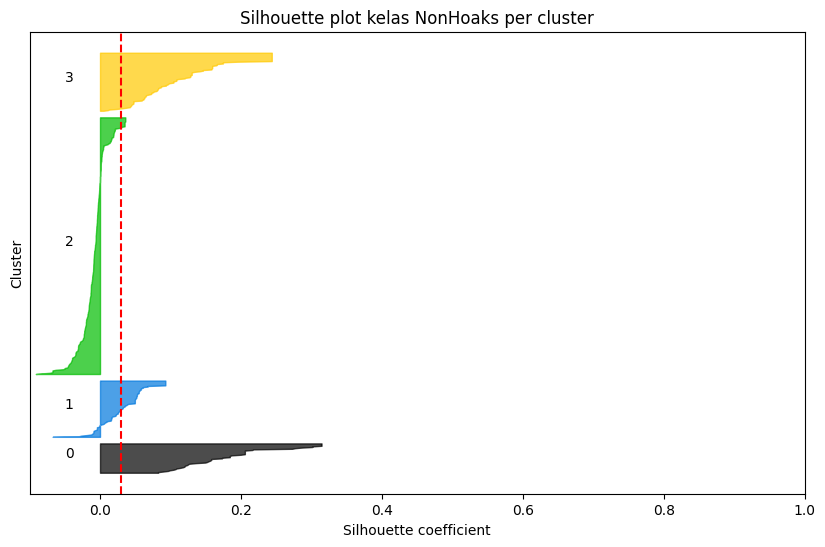

In [ ]:
def plot_silhouette(n_clusters, silhouette_values, labels):
    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Nilai Silhouette untuk cluster i
        cluster_silhouette_values = silhouette_values[labels == i]
        cluster_silhouette_values.sort()

        size_cluster = len(cluster_silhouette_values)
        y_upper = y_lower + size_cluster

        # Warna cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Tambahkan label untuk setiap cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Perbarui y_lower
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot kelas NonHoaks per cluster")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

    # Garis rata-rata Silhouette
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    plt.show()

plot_silhouette(kn_nonhoaks.n_clusters, silhouette_values, kn_nonhoaks.labels_)

Analisis Antar-Cluster (Eksternal):

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist # Import the cdist function
centroids = []
for cluster_id in sorted(df_nonhoaks_w['Cluster'].unique()):
    cluster_data = tfidf_matrix[df_nonhoaks_w['Cluster'] == cluster_id]
    centroid = cluster_data.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

print("Centroid tiap cluster:\n", centroids)


Centroid tiap cluster:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00099575 0.001216   0.00228962 ... 0.00052934 0.00312437 0.00043937]
 [0.         0.00457445 0.         ... 0.         0.         0.        ]]


Visualisasi centroid cluster

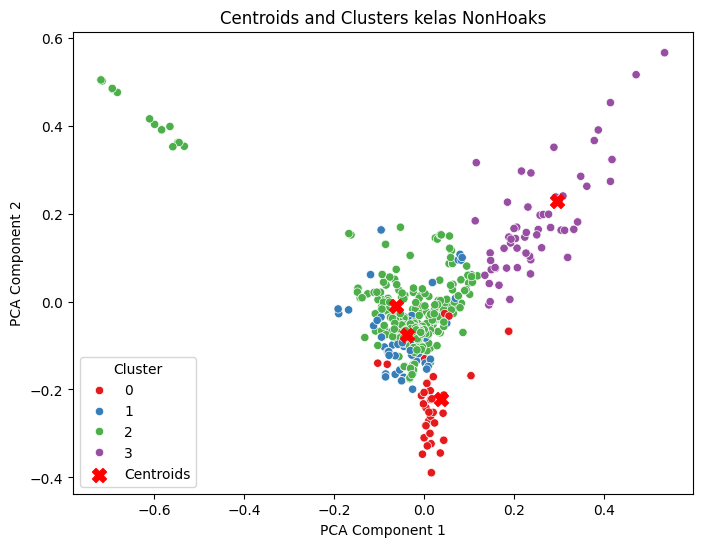

In [ ]:
centroids = []
for cluster_id in sorted(df_nonhoaks_w['Cluster'].unique()):
    cluster_data = reduced_data[df_nonhoaks_w['Cluster'] == cluster_id]
    centroid = cluster_data.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

# Plot data points dan centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_nonhoaks_w['Cluster'], palette='Set1', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='X')
plt.title("Centroids and Clusters kelas NonHoaks")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
distances = cdist(centroids, centroids, metric='euclidean')
print("Jarak antar centroid:\n", distances)

Jarak antar centroid:
 [[0.         0.16314887 0.23448391 0.51781161]
 [0.16314887 0.         0.07173594 0.4506819 ]
 [0.23448391 0.07173594 0.         0.4285025 ]
 [0.51781161 0.4506819  0.4285025  0.        ]]


Visualisasi dengan heatmap

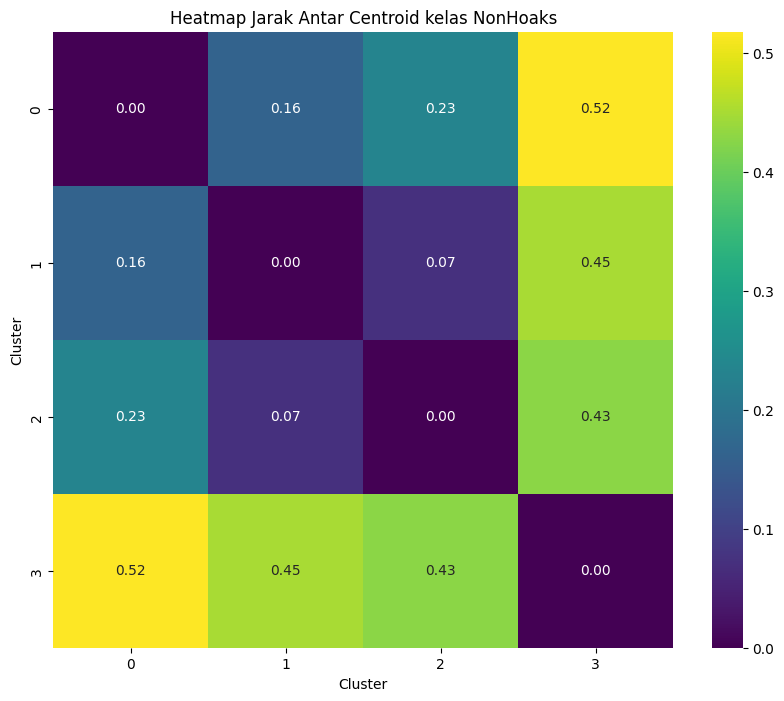

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(distances, annot=True, cmap='viridis', fmt='.2f', cbar=True,
            xticklabels=sorted(df_nonhoaks_w['Cluster'].unique()),
            yticklabels=sorted(df_nonhoaks_w['Cluster'].unique()))

plt.title("Heatmap Jarak Antar Centroid kelas NonHoaks")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Hitung Davies-Bouldin Index using the dense array
dense_tfidf_matrix = tfidf_matrix.toarray()
db_index = davies_bouldin_score(dense_tfidf_matrix, df_nonhoaks_w['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 4.985459638057698


1. Cluster 0

In [ ]:
cluster_0_nonhoaks = df_nonhoaks_w[df_nonhoaks_w['Cluster'] == 0]
display(cluster_0_nonhoaks)


username                                     clean_text_fix  \
21        polseksatui  waspada hoaks ujaran kebencian jelang pemiliha...   
92          bntgyeyy7  waspada berita berita palsu mari lawan hoaks p...   
97       PulungPolsek  waspada hoaks ujaran kebencian jelang pemiliha...   
171     SantaiTerooos     waspada berita palsu hoaks menjelang pemilihan   
292       kilasreborn   waspada berita bohong disebarkan pasca pemilihan   
293         DedeKiven   waspada berita bohong disebarkan pasca pemilihan   
485       Hero_bujang             waspada berita bohong jelang pemilihan   
621     polres_bintan    waspada hoaks ujaran kebencian jelang pemilihan   
675         i_bersatu                waspada pemberitaan hoaks pemilihan   
677      suroboyo_cok      waspada berita hoaks wujudkan pemilihan damai   
688     SantaiTerooos           waspada berita hoaks menjelang pemilihan   
691    AhmadSyahron11      waspada berita hoaks wujudkan pemilihan damai   
692   AndikaSulistioo      waspada berita hoaks wujudkan pemilihan damai   
693      citra_nasrah      waspada berita hoaks wujudkan pemilihan damai   
694      AyuArianty99      waspada berita hoaks wujudkan pemilihan damai   
695    CindyLestari03      waspada berita hoaks wujudkan pemilihan damai   
705         Windi5858                     waspada hoaks jelang pemilihan   
709    diaharmayanti1                     waspada berita hoaks pemilihan   
710     anselarsenio_      waspada berita hoaks wujudkan pemilihan damai   
749       kecilamat12                      waspada hoaks pasca pemilihan   
750     PancasilaBumi  waspada hoaks hoaks terkait pemilihan pengguna...   
751     PancasilaBumi                    pemilihan selesai waspada hoaks   
752     bluepoison18J  waspada hoaks pasca pemilihan bijak bersosial ...   
753     bluepoison18J    pemilihan selesai waspada hoaks pasca pemilihan   
758     dellaannissaa                      waspada hoaks pasca pemilihan   
763     PancasilaBumi     bijaklah waspada hoaks hoaks terkait pemilihan   
765     bluepoison18J  waspada hoaks pasca pemilihan bijak bersosial ...   
767     CarolinaSario                      waspada hoaks pasca pemilihan   
768       jordi_danny  waspada hoaks pasca pemilihan mudah terprovoka...   
793     PancasilaBumi  pemilihan selesai waspada hoaks terkait pemilihan   
804     PancasilaBumi  waspada hoaks pasca pemilihan bijaklah bermedi...   
810       jordi_danny  bijak bersosial medium waspada hoaks pasca pem...   
833     bluepoison18J  waspada hoaks pasca pemilihan bijak bersosial ...   
834     PancasilaBumi                      waspada hoaks pasca pemilihan   
835     CarolinaSario  waspada hoaks pasca pemilihan bijak bermedia s...   
836       jordi_danny  waspada hoaks pasca pemilihan bijak bersosial ...   
897     dellaannissaa               waspada berita hoaks pasca pemilihan   
936     PancasilaBumi    hoaks provokasi terkait pemilihan marak waspada   
937         i_bersatu  waspada hoaks mudah terprovokasi pemberitaan p...   
938       polreslahat  waspada penyebaran hoaks masyarakat cerdas mem...   
976     PowerKuning73                            waspada hoaks pemilihan   
986      ANDIEbaket18  cerdas memilih memilah informasi waspada hoaks...   
1010      polreslahat  cerdas memilih memilah informasi waspada hoaks...   
1020    PancasilaBumi                            waspada hoaks pemilihan   
1048    DJ_ATALIACHAN    waspada provokasi waspada hoaks pasca pemilihan   
1075    bluepoison18J              pemilihan selesai waspada hoaks pasca   
1117    CarolinaSario        kawan bersatu waspada hoaks pasca pemilihan   
1146    PancasilaBumi                waspada hoaks pasca pemilihan marak   
1155      ClaudiaJea1             waspada hoaks pemilihan terpecah belah   
1157      jordi_danny                      waspada hoaks pasca pemilihan   

         label  Cluster  
21    nonhoaks        0  
92    nonhoaks        0  
97    nonhoaks        0  
171   nonhoaks        0  
292   

Nilai Cosine Similarity Antar Data pada Cluster 0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_0 = vectorizer.fit_transform(cluster_0_nonhoaks['clean_text_fix'])

cosine_sim_matrix_0 = cosine_similarity(tfidf_matrix_cluster_0)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 0
print("Cosine Similarity Matrix for Cluster 0:")
print(cosine_sim_matrix_0[:5, :5])  # Menampilkan sebagian matriks untuk efisiensi

Cosine Similarity Matrix for Cluster 0:
[[1.         0.24343109 1.         0.28201249 0.09042089]
 [0.24343109 1.         0.24343109 0.47913105 0.20974289]
 [1.         0.24343109 1.         0.28201249 0.09042089]
 [0.28201249 0.47913105 0.28201249 1.         0.17797011]
 [0.09042089 0.20974289 0.09042089 0.17797011 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 0

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_0 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_0[i, j]}")


Data ke-0 dan Data ke-2 memiliki similarity lebih dari 0.5: 0.9999999999999999
Data ke-0 dan Data ke-7 memiliki similarity lebih dari 0.5: 0.5459072941771066
Data ke-1 dan Data ke-17 memiliki similarity lebih dari 0.5: 0.5193609697135783
Data ke-2 dan Data ke-0 memiliki similarity lebih dari 0.5: 0.9999999999999999
Data ke-2 dan Data ke-7 memiliki similarity lebih dari 0.5: 0.5459072941771066
Data ke-3 dan Data ke-10 memiliki similarity lebih dari 0.5: 0.8159367745632029
Data ke-4 dan Data ke-5 memiliki similarity lebih dari 0.5: 1.0
Data ke-4 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.581048406111232
Data ke-5 dan Data ke-4 memiliki similarity lebih dari 0.5: 1.0
Data ke-5 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.581048406111232
Data ke-6 dan Data ke-4 memiliki similarity lebih dari 0.5: 0.581048406111232
Data ke-6 dan Data ke-5 memiliki similarity lebih dari 0.5: 0.581048406111232
Data ke-6 dan Data ke-16 memiliki similarity lebih dari 0.5: 0.6154529508994439
Data

Visualisasi Force-Directed Graph

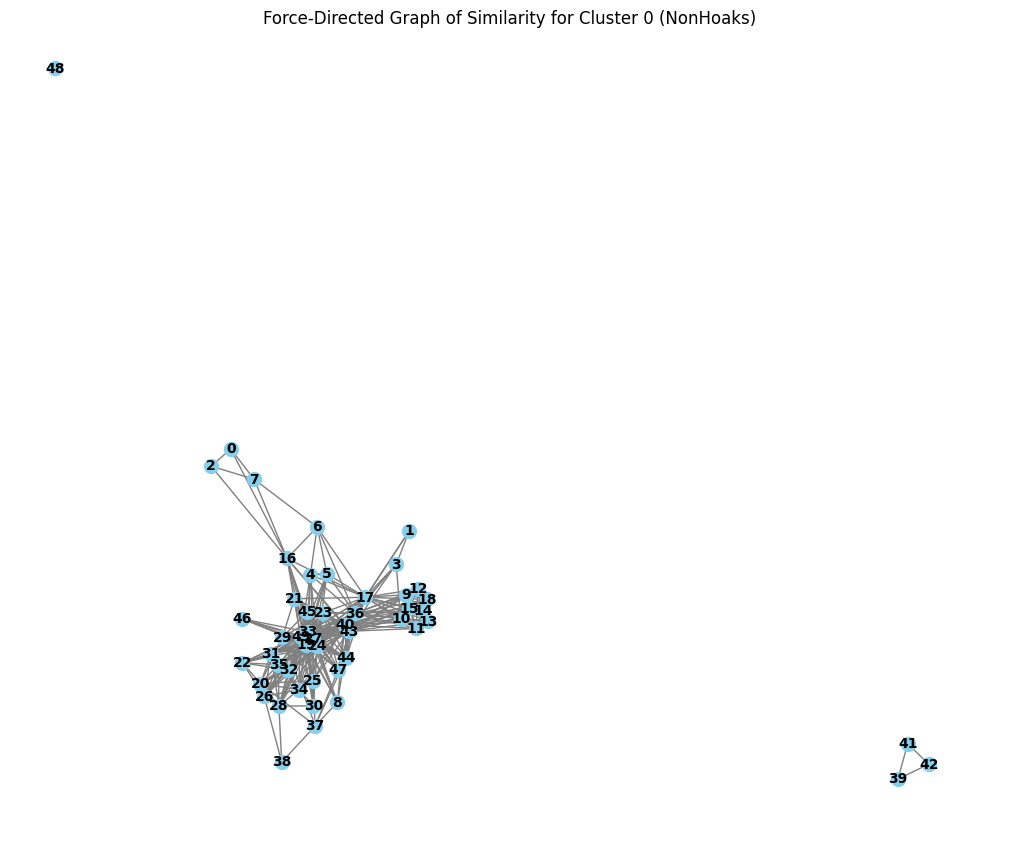

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_0_nonhoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3
for i in range(cosine_sim_matrix_0.shape[0]):
    for j in range(i+1, cosine_sim_matrix_0.shape[1]):
        if cosine_sim_matrix_0[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_0[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 0 (NonHoaks)")
    plt.show()


Visualisasi WordCloud Cluster 0 Kelas Hoaks

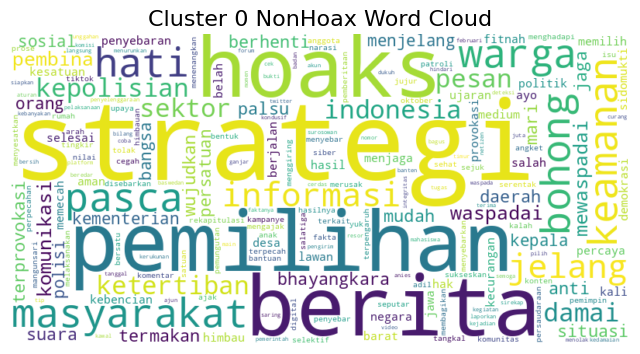

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 0
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} NonHoax Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

2. Cluster 1

In [ ]:
cluster_1_nonhoaks = df_nonhoaks_w[df_nonhoaks_w['Cluster'] == 1]
display(cluster_1_nonhoaks)

username                                     clean_text_fix  \
13      faidah_fazma  hindari berita palsu informasi merusak mari ja...   
18             skqyy  hindari berita palsu informasi merusak mari ja...   
28        SKlungkung  kepala kepolisian resor klungkung mengimbau ma...   
29        PKlungkung  kepala kepolisian resor klungkung mengimbau ma...   
98      aprianto_fi2  hindari berita palsu informasi merusak mari ja...   
...              ...                                                ...   
1098   Meriah_Polsek  polisi rukun warga dusun desa marjandi pematan...   
1099   Meriah_Polsek  bhayangkara pembina keamanan ketertiban masyar...   
1116      polsek_pgd  bhayangkara pembina keamanan ketertiban masyar...   
1121  humaspolsekkrm  bhayangkara pembina keamanan ketertiban masyar...   
1130     BarronIndra       masyarakat menghadapi berita hoaks pemilihan   

         label  Cluster  
13    nonhoaks        1  
18    nonhoaks        1  
28    nonhoaks        1  
29    nonhoaks        1  
98    nonhoaks        1  
...        ...      ...  
1098  nonhoaks        1  
1099  nonhoaks        1  
1116  nonhoaks        1  
1121  nonhoaks        1  
1130  nonhoaks        1  

[95 rows x 4 columns]

Nilai Cosine Similarity Antar Data pada Cluster 1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_1 = vectorizer.fit_transform(cluster_1_nonhoaks['clean_text_fix'])

cosine_sim_matrix_1 = cosine_similarity(tfidf_matrix_cluster_1)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 1
print("Cosine Similarity Matrix for Cluster 1:")
print(cosine_sim_matrix_1[:5, :5])  # Menampilkan sebagian matriks untuk efisiensi

Cosine Similarity Matrix for Cluster 1:
[[1.         1.         0.12183121 0.12183121 1.        ]
 [1.         1.         0.12183121 0.12183121 1.        ]
 [0.12183121 0.12183121 1.         1.         0.12183121]
 [0.12183121 0.12183121 1.         1.         0.12183121]
 [1.         1.         0.12183121 0.12183121 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 1

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_1 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_1[i, j]}")

Data ke-0 dan Data ke-1 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-0 dan Data ke-4 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-0 dan Data ke-5 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-0 dan Data ke-6 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-0 dan Data ke-7 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-1 dan Data ke-0 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-1 dan Data ke-4 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-1 dan Data ke-5 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-1 dan Data ke-6 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-1 dan Data ke-7 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-2 dan Data ke-3 memiliki similarity lebih dari 0.5: 1.0000000000000002
Data ke-2 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.5272794296070503
Data ke-2 dan Data ke-10 memiliki similarity lebih d

Visualisasi Force-Directed Graph

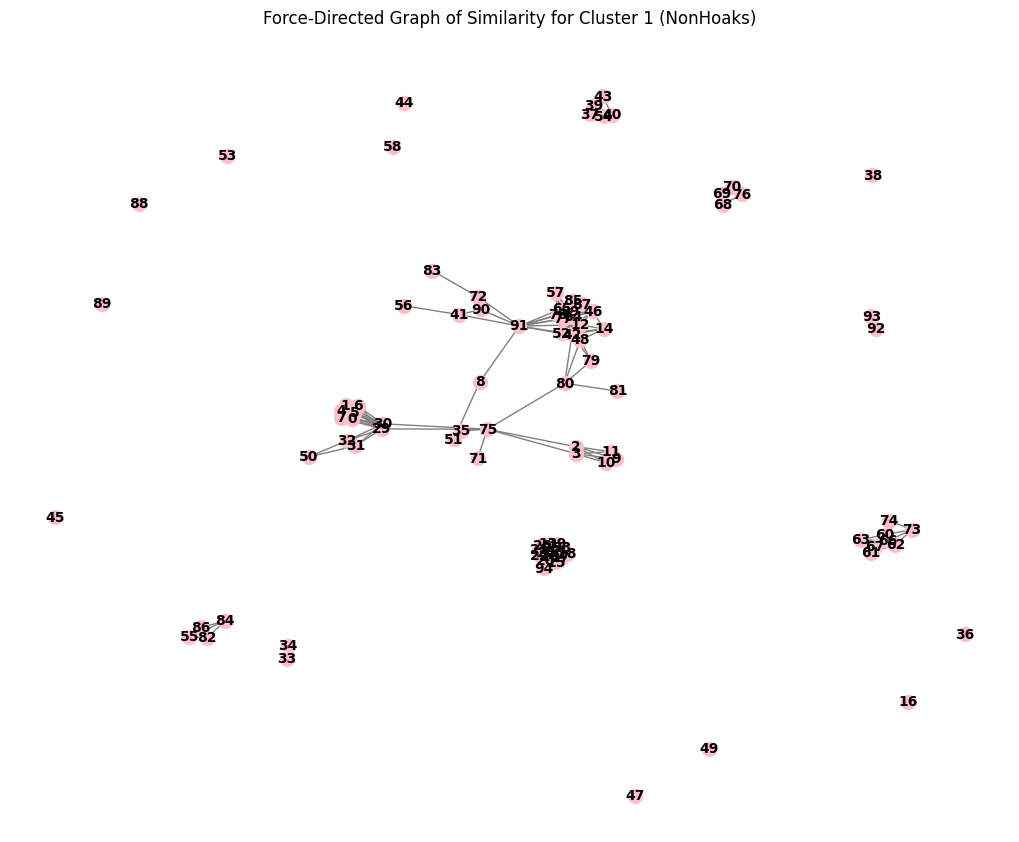

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_1_nonhoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3
for i in range(cosine_sim_matrix_1.shape[0]):
    for j in range(i+1, cosine_sim_matrix_1.shape[1]):
        if cosine_sim_matrix_1[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_1[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 1 (NonHoaks)")
    plt.show()

Visualisasi WordCloud Cluster 1 Kelas NonHoaks

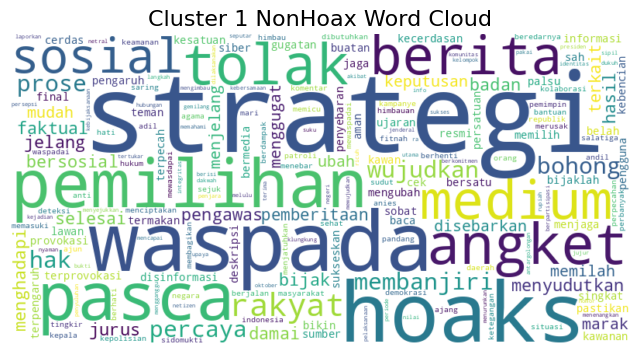

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 1
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} NonHoax Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

3. Cluster 2

In [ ]:
cluster_2_nonhoaks = df_nonhoaks_w[df_nonhoaks_w['Cluster'] == 2]
display(cluster_2_nonhoaks)

username                                     clean_text_fix  \
0        radhynkania  stres baca berita covid demam panas dingin sem...   
1     BobbieTrussell  berhati hatilah berita palsu pertimbangkan ber...   
3         WahidUnyax  lawan berita palsu hoaks disinformasi tercapai...   
4     Kota_Tangerang  pemerintah kota pemerintahan kota tangerang di...   
5         s3mut1reng  dimanfaatkan kelompok radikal menyebarkan hoak...   
...              ...                                                ...   
1163  Jalurlangitygy  yuk mari bersatu jadikan pemilihan momen nilai...   
1165        annix_14                               pemilihan anti hoaks   
1171            wdtu  petani bersyukur harga beras mahal diuntungkan...   
1176      DindaP1805  demokrasi kuat ruang digital bersih mari menja...   
1177    perdamaian__                               pemilihan anti hoaks   

         label  Cluster  
0     nonhoaks        2  
1     nonhoaks        2  
3     nonhoaks        2  
4     nonhoaks        2  
5     nonhoaks        2  
...        ...      ...  
1163  nonhoaks        2  
1165  nonhoaks        2  
1171  nonhoaks        2  
1176  nonhoaks        2  
1177  nonhoaks        2  

[430 rows x 4 columns]

Nilai Cosine Similarity Antar Data pada Cluster 2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_2 = vectorizer.fit_transform(cluster_2_nonhoaks['clean_text_fix'])

cosine_sim_matrix_2 = cosine_similarity(tfidf_matrix_cluster_2)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 2
print("Cosine Similarity Matrix for Cluster 2:")
print(cosine_sim_matrix_2[:5, :5])  # Menampilkan sebagian matriks untuk efisiensi

Cosine Similarity Matrix for Cluster 2:
[[1.         0.01908069 0.0368627  0.01440449 0.01666086]
 [0.01908069 1.         0.04586559 0.01792247 0.04058486]
 [0.0368627  0.04586559 1.         0.07388462 0.04553424]
 [0.01440449 0.01792247 0.07388462 1.         0.02878027]
 [0.01666086 0.04058486 0.04553424 0.02878027 1.        ]]


Nilai Cosine Cimilarity Tertinggi di Cluster 2

In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_2 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_2[i, j]}")

Data ke-6 dan Data ke-7 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-6 dan Data ke-8 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-6 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.919064493380791
Data ke-6 dan Data ke-10 memiliki similarity lebih dari 0.5: 1.0
Data ke-7 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-7 dan Data ke-8 memiliki similarity lebih dari 0.5: 1.0
Data ke-7 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.9939114533931979
Data ke-7 dan Data ke-10 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-8 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-8 dan Data ke-7 memiliki similarity lebih dari 0.5: 1.0
Data ke-8 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.9939114533931979
Data ke-8 dan Data ke-10 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-9 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.919064493380791
Data ke-9 dan Data ke-7

Visualisasi Force-Directed Graph

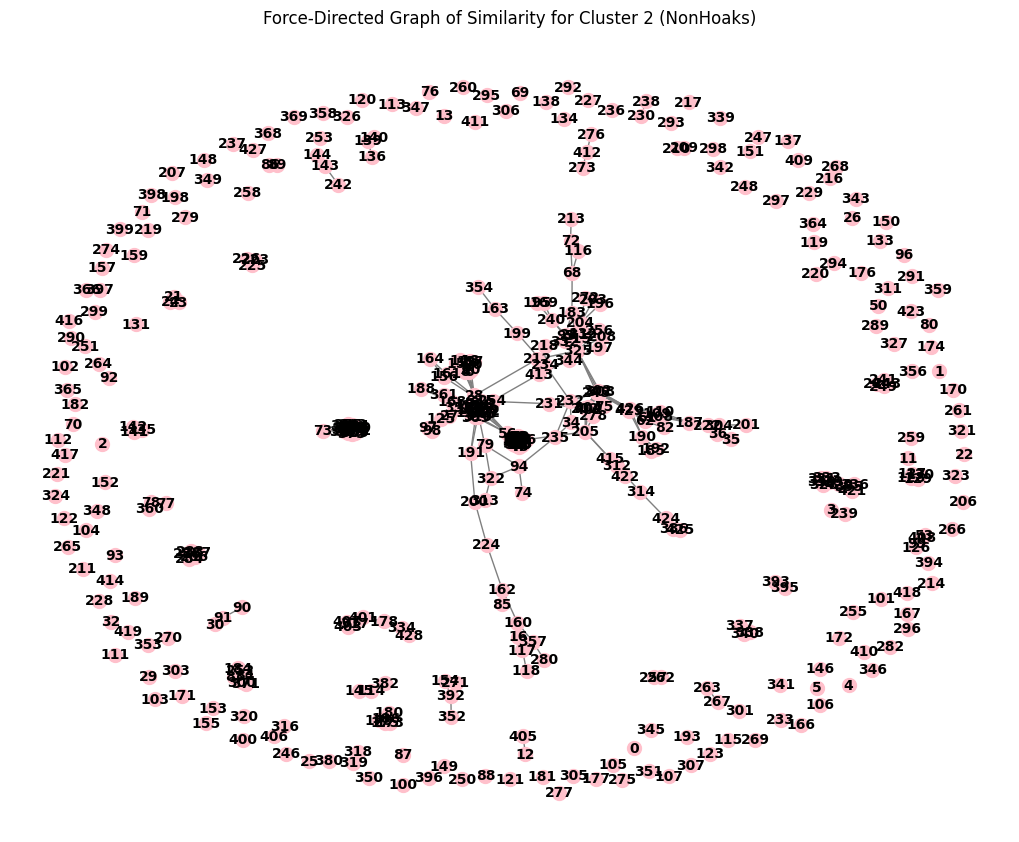

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_2_nonhoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3
for i in range(cosine_sim_matrix_2.shape[0]):
    for j in range(i+1, cosine_sim_matrix_2.shape[1]):
        if cosine_sim_matrix_2[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_2[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 2 (NonHoaks)")
    plt.show()

Visualisasi WordCloud Cluster 2 Kelas NonHoaks

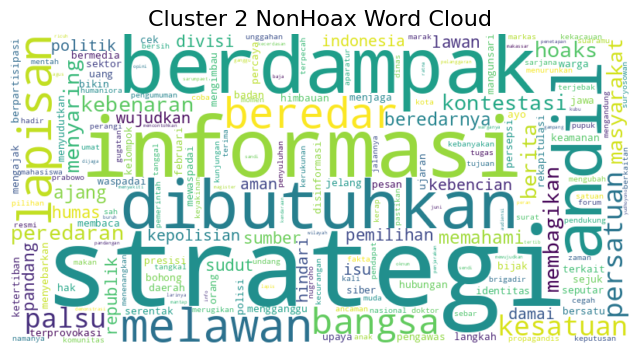

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 2
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} NonHoax Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

4. Cluster 3

In [ ]:
cluster_3_nonhoaks = df_nonhoaks_w[df_nonhoaks_w['Cluster'] == 3]
display(cluster_3_nonhoaks)

username                                     clean_text_fix  \
10    Humas_polresstg  menyebarkan berita palsu hoaks periode pemilih...   
141    GedebagePolsek  berhenti provokasi mari wujudkan pemilihan kep...   
170   Polresbanjarjbr  berhenti provokasi mari wujudkan pemilihan kep...   
198   polres_badung__  pemilihan aman damai sejuk orang bijak percaya...   
203   sekkarangmalan2  berhenti hoaks berita bohong penyebab keretaka...   
...               ...                                                ...   
1123  FaisalTea525131  pemilihan damai hoaks intoleransi isu suku aga...   
1124  humaspolsek_rdk  pemilihan damai hoaks intoleransi isu suku aga...   
1126      polsek_skjd  pemilihan damai hoaks intoleransi isu suku aga...   
1127   humaspolressmd  pemilihan damai hoaks intoleransi isu suku aga...   
1141    humaspoldajbr  pemilihan damai hoaks intoleransi isu suku aga...   

         label  Cluster  
10    nonhoaks        3  
141   nonhoaks        3  
170   nonhoaks        3  
198   nonhoaks        3  
203   nonhoaks        3  
...        ...      ...  
1123  nonhoaks        3  
1124  nonhoaks        3  
1126  nonhoaks        3  
1127  nonhoaks        3  
1141  nonhoaks        3  

[98 rows x 4 columns]

Visualisasi Force-Directed Graph

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix_cluster_3 = vectorizer.fit_transform(cluster_3_nonhoaks['clean_text_fix'])

cosine_sim_matrix_3 = cosine_similarity(tfidf_matrix_cluster_3)

# Menampilkan sebagian matriks cosine similarity untuk Cluster 3
print("Cosine Similarity Matrix for Cluster 3:")
print(cosine_sim_matrix_3[:5, :5])  # Menampilkan sebagian matriks untuk efisiensi

Cosine Similarity Matrix for Cluster 3:
[[1.         0.04660415 0.04660415 0.09801758 0.13740787]
 [0.04660415 1.         1.         0.16411064 0.28706729]
 [0.04660415 1.         1.         0.16411064 0.28706729]
 [0.09801758 0.16411064 0.16411064 1.         0.25459327]
 [0.13740787 0.28706729 0.28706729 0.25459327 1.        ]]


In [ ]:
import numpy as np

# Menyaring dokumen yang memiliki cosine similarity lebih dari 0.5
threshold = 0.5
high_similarity_pairs = np.where(cosine_sim_matrix_2 > threshold)

# Menampilkan pasangan dokumen yang memiliki similarity tinggi
for i, j in zip(*high_similarity_pairs):
    if i != j:  # Menghindari pasangan dokumen dengan dirinya sendiri
        print(f"Data ke-{i} dan Data ke-{j} memiliki similarity lebih dari {threshold}: {cosine_sim_matrix_2[i, j]}")

Data ke-6 dan Data ke-7 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-6 dan Data ke-8 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-6 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.919064493380791
Data ke-6 dan Data ke-10 memiliki similarity lebih dari 0.5: 1.0
Data ke-7 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-7 dan Data ke-8 memiliki similarity lebih dari 0.5: 1.0
Data ke-7 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.9939114533931979
Data ke-7 dan Data ke-10 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-8 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-8 dan Data ke-7 memiliki similarity lebih dari 0.5: 1.0
Data ke-8 dan Data ke-9 memiliki similarity lebih dari 0.5: 0.9939114533931979
Data ke-8 dan Data ke-10 memiliki similarity lebih dari 0.5: 0.915675937310516
Data ke-9 dan Data ke-6 memiliki similarity lebih dari 0.5: 0.919064493380791
Data ke-9 dan Data ke-7

Visualisasi WordCloud Cluster 3 Kelas NonHoaks

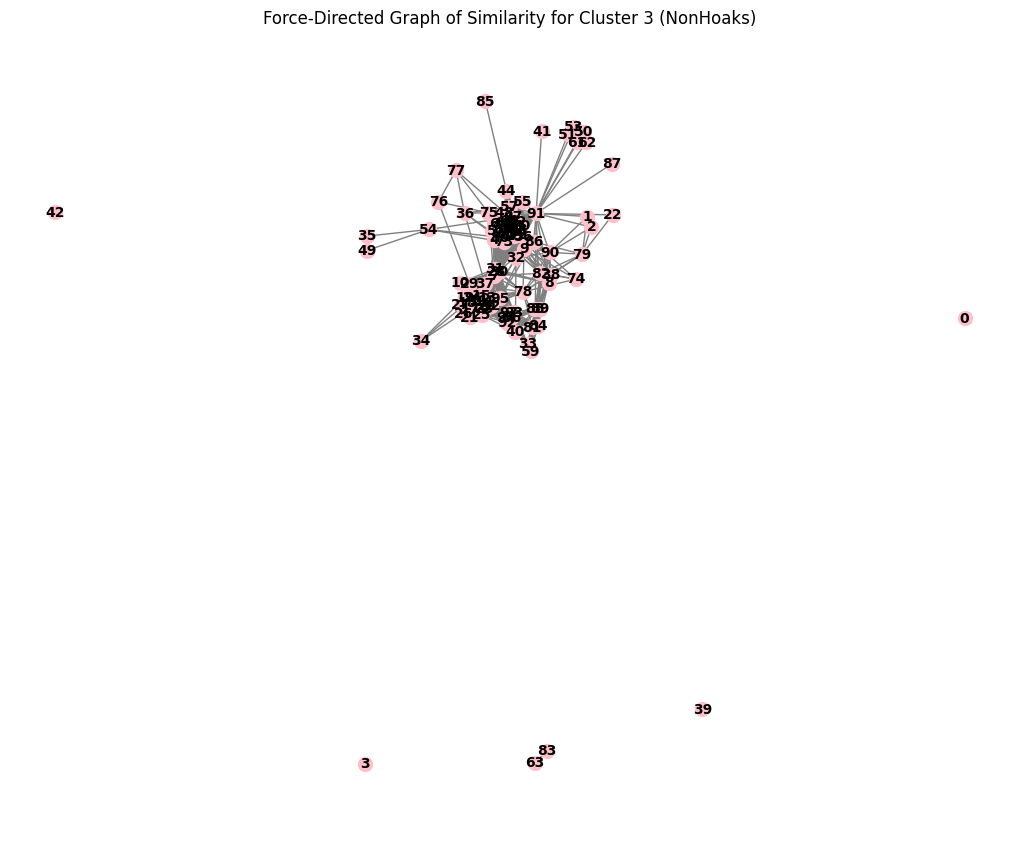

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Menambahkan nodes (dokumen)
G.add_nodes_from(range(len(cluster_3_nonhoaks)))

# Menambahkan edges untuk similarity yang lebih tinggi dari 0.3
threshold = 0.3
for i in range(cosine_sim_matrix_3.shape[0]):
    for j in range(i+1, cosine_sim_matrix_3.shape[1]):
        if cosine_sim_matrix_3[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix_3[i, j])

# Memeriksa apakah ada edge
if len(G.edges) == 0:
    print("Tidak ada edge yang memenuhi threshold.")
else:
    # Menampilkan visualisasi graf dengan layout yang berbeda
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Force-Directed Graph of Similarity for Cluster 3 (NonHoaks)")
    plt.show()

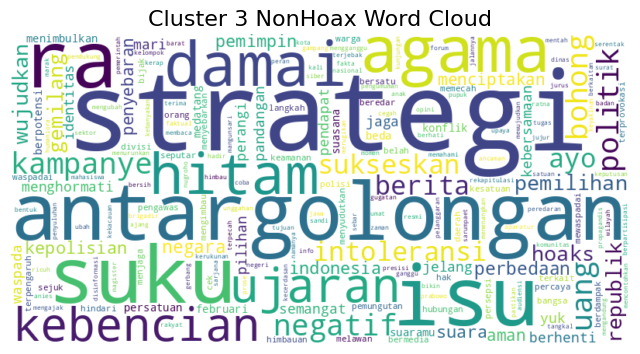

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

i = 3
plt.figure(figsize=(8, 6))

cluster_terms = [terms[ind] for ind in order_centroids[i]]
text = ' '.join(cluster_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Cluster {i} NonHoax Word Cloud', fontsize=16)
plt.axis('off')
plt.show()